# HW4

Please submit this assignment as a Jupyter Notebook with exactly the same name as "HW4.ipynb"  on Github.

In [72]:
# Import needed packages
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

Fill out the blanks to solve Prob. **2.18** in the textbook. 

0. create v and F dataset according to both data table and function
1. plot the data using circular magenta markers
2. plot the function using a thin black dotted line
3. Set the range of the x-axis to [0, 100]
4. label axes and include grid lines

In [ ]:
# Creating velocity array according to the data table
v_data = np.arange(10,90,10)

# Creating force array according to the data table
F_data = np.array([25,75,380,550,610,1220,830,1450])

# Creating equally spaced 100 data in range 0 to 100
v_f = np.linspace(0,100,100)

# Generating force array using the given function
F_f = 0.274*np.power(v_f, 1.984)


In [ ]:
# Plotting
plt.figure(figsize=(4,3))
plt.plot(v_data,F_data,'m.')
plt.plot(v_f,F_f,'k:')
plt.grid(True)
plt.xlim(0,100)
plt.xlabel('velocity')
plt.ylabel('Force')
plt.show()

## Problem 2

Fill out the blanks to solve Prob. **2.19** in the textbook.

In [ ]:
# Create a log-log plot of the data and function from Prob. 2.18
plt.figure(figsize=(4,3))
plt.loglog(v_data,F_data,"m.")
plt.loglog(v_f,F_f,"k:")
plt.show()

## Problem 3

Fill out the blanks to solve Prob. **2.27** in the textbook.

0. create t dataset from 0 to 100 in steps of 1/16
1. plot x and y versus t using black lines and include a legend
2. plot y versus x and make the axes equal
3. add plot titles
4. Label axes and include grid lines

In [ ]:
# Create t dataset
t = np.arange(0,100.05,1/16)

# Create x and y dataset
x = np.sin(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-(np.sin(t/12))**5)

y = np.cos(t)*(np.exp(np.cos(t))-2*np.cos(4*t)-(np.sin(t/12))**5)

# Plot results
plt.figure(figsize=(16,12))

# First, plot k vs. Ta
plt.subplot(121)
plt.plot(t, x, 'k-', label='x')
plt.plot(t, y, 'k:', label='y')
plt.title('x&y vs. t')
plt.xlabel('t')
plt.ylabel('x or y')
plt.legend()
plt.grid(True)

# Second, plot log10(k) vs. 1/Ta
plt.subplot(122)
plt.plot(x, y, 'r')
plt.title('y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)

plt.show()

## Problem 4: Digital Rock Statistics
Problem 4 is designed to practice imshow and histogram plotting. 
This [reservoir model](https://www.spe.org/web/csp/datasets/set02.htm) consists of part of a Brent sequence. The model size is 60 x 220 x 85 cells. We will do some analysis on porosity, permeability and relative permeability data.

please fill out the following blanks to finish tasks:
* load porosity, permeability and relative perm table from your current working directory
- reshape data and split permeability into kx, ky and kz
- plot a slice(z=50) of porosity, kx, ky and kz
- plot histograms of porosity, kx, ky and kz for the entire reservoir
- plot relative permeability curve


In [37]:
# Load data
perm = np.loadtxt("spe_perm.dat", dtype=np.float64)
phi = np.loadtxt("spe_phi.dat", dtype=np.float64)
rel_perm = np.loadtxt('rel_perm_table.txt', dtype = np.float64, skiprows=1)

In [51]:
# a) Reshape porosity data in Nz-Ny-Nx sequence
# Permeability data contain permeability in x direction, y direction and z direction
# Reshape and split permeability into permx (Kx), permy(Ky) and permz(Kz)
Nx = 60
Ny = 220
Nz = 85
perm.shape = (3, Nz,Ny,Nx)
phi.shape = (Nz,Ny,Nx)

permx = perm[0,:,:,:]
permy = perm[1,:,:,:]
permz = perm[2,:,:,:]

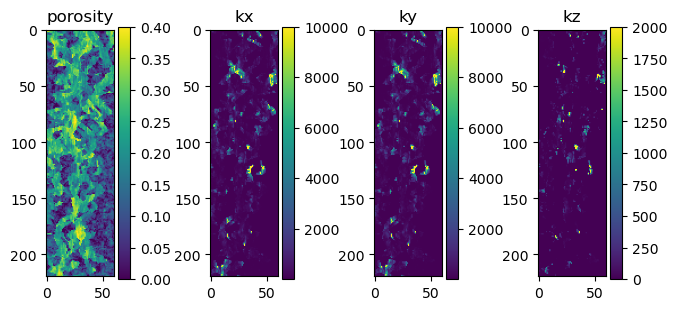

In [57]:
# b) Use subplots to plot a slice(z = 50) of porosity, kx, ky and kz through the reservoir
# Add titles for each subplot
plt.subplot(1,4,1)
plt.imshow(phi[50,:,:])
plt.colorbar()
plt.title('Porosity')

plt.subplot(1,4,2)
plt.imshow(perm[0,50,:,:], vmax = 10000)
plt.colorbar()
plt.title('Kx')

plt.subplot(1,4,3)
plt.imshow(perm[1,50,:,:],vmax = 10000)
plt.colorbar()
plt.title('Ky')

plt.subplot(1,4,4)
plt.imshow(perm[2,50,:,:],vmax = 2000)
plt.colorbar()
plt.title('Kz')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.95, hspace=1)

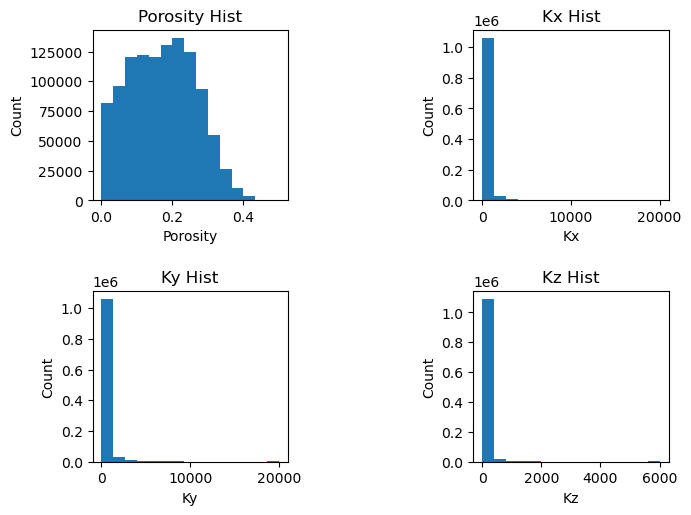

In [66]:
# c) Use subplots to plot histograms of the porosity, kx, ky and kz of the whole reservoir.
# You may need np.flatten() to convert a nD array into 1D array.
# Include axes labels and titles for each subplot.

plt.subplot(2,2,1)
plt.hist(phi.flatten(), 15)
plt.xlabel('Porosity')
plt.ylabel('Count')
plt.title('Porosity Hist')

plt.subplot(2,2,2)
plt.hist(permx.flatten(),15)
plt.xlabel('Kx')
plt.ylabel('Count')
plt.title('Kx Hist')

plt.subplot(2,2,3)
plt.hist(permy.flatten(),15)
plt.xlabel('Ky')
plt.ylabel('Count')
plt.title('Ky Hist')

plt.subplot(2,2,4)
plt.hist(permz.flatten(),15)
plt.xlabel('Kz')
plt.ylabel('Count')
plt.title('Kz Hist')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.95, hspace=0.53)
plt.show()

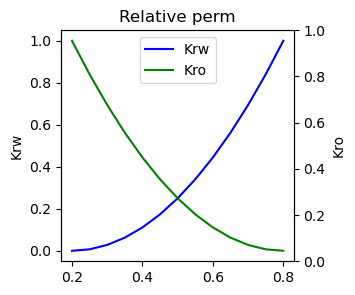

In [78]:
# d) Plot relative permeability of water phase versus water saturation using a blue line. 
# Plot relative permeability of oil phase versus water saturation using a green line. 
# Label axes, add legend
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()

ax.set_ylabel('Krw')
ax2 = ax.twinx()
ax2.set_ylabel('Kro')

ax.plot(rel_perm[:,0], rel_perm[:,1],'b', label='Krw')
ax.plot(rel_perm[:,0], rel_perm[:,2],'g', label='Kro')
plt.xlabel('Sw')
# plt.ylabel('Krw, Kro')
ax.legend()
plt.title('Relative perm')

plt.show()